# Auf der Suche nach Fraud

In [1]:
import numpy as np
import pandas as pd
import scipy, scipy.stats

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm


sns.set();

## Die bereinigten Daten

In [5]:
file_name = '../data/bank_transactions.csv'
data = pd.read_csv(file_name) 

In [6]:
data.head()

,step,customer,age,gender,merchant,category,amount,fraud
0,0,C1093826151,4,M,M348934600,es_transportation,4.55,0
1,0,C352968107,2,M,M348934600,es_transportation,39.68,0
2,0,C2054744914,4,F,M1823072687,es_transportation,26.89,0
3,0,C1760612790,3,M,M348934600,es_transportation,17.25,0
4,0,C757503768,5,M,M348934600,es_transportation,35.72,0


---

## Genauere Betrachtung der Daten

Aus der Beschreibung der Daten wissen wir, dass die "steps" in etwas aufeinanderfolgende Tage beschreiben. Um etwas besser zu verstehen was in den Daten steht, schauen wir uns diese zunächst nach Tagen an. Dabei fassen wir die Daten zu den steps zusammen, in dem wir den Mittelwert für jeden Tag und für jede nummerische Spalte berechnen.

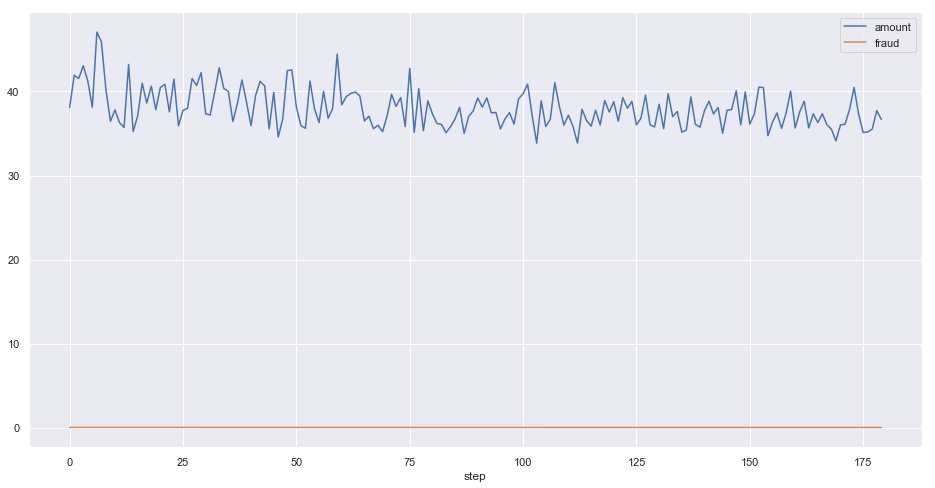

In [7]:
data.groupby('step').mean().plot(figsize=(16,8));

Sieht so aus als wäre die Fraud-Rate pro Tag konstant... ist er aber nicht! Alles eine Frage der Skalierung!

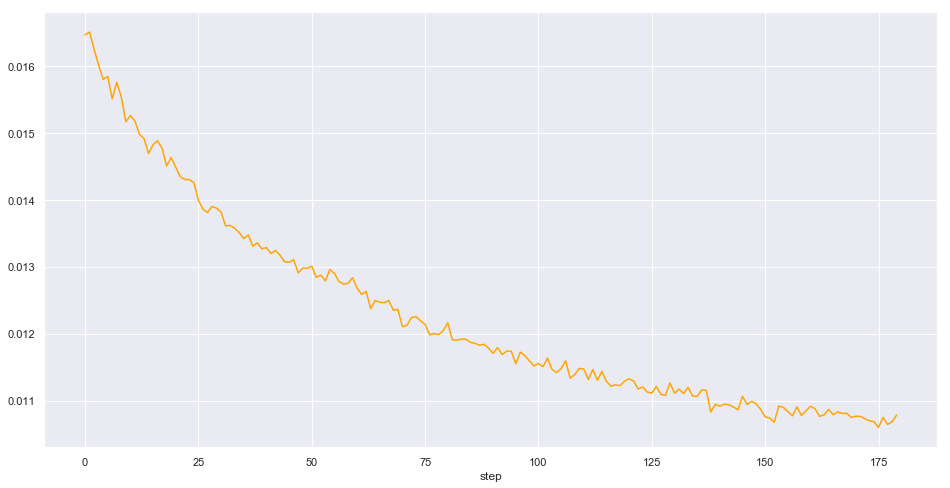

In [8]:
data.groupby('step')['fraud'].mean().plot(figsize=(16,8), color='orange');

** Neue Frage: Warum nimmt die Fraud-Rate ab?! **

Zwei Möglichkeiten:
1. Fraud nimmt über die Zeit ab, bei ähnlichen vielen Transaktionen
2. Transaktionen nehmen über die Zeit zu und Fraud nicht gleichermaßen

Wir wollen die beide Hypothesen überprüfen!

Dazu zählen wir die Anzahl der Zeilen pro Tag (entspricht den Transaktionen) und summieren die Spalte 'fraud' pro Tag um die Anzahl der fraud-Transaktionen pro Tag zu erhalten.

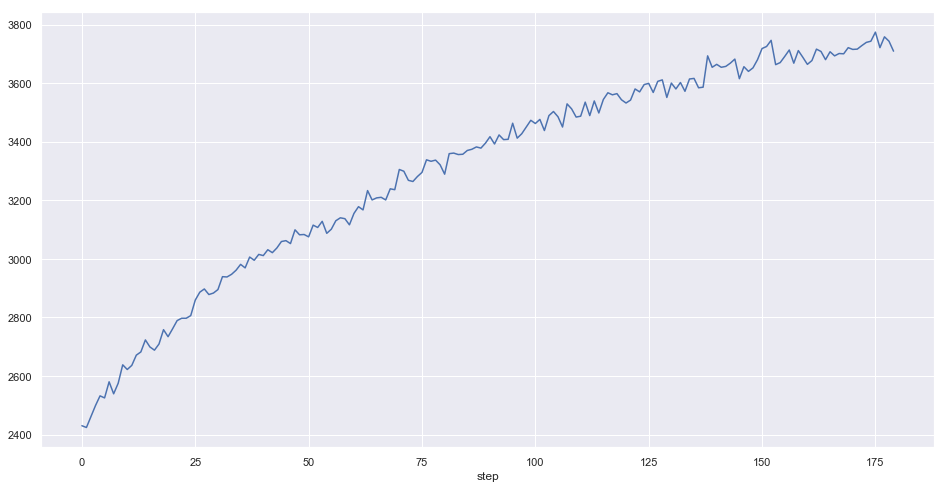

In [9]:
data.groupby('step')['fraud'].count().plot(figsize=(16,8));

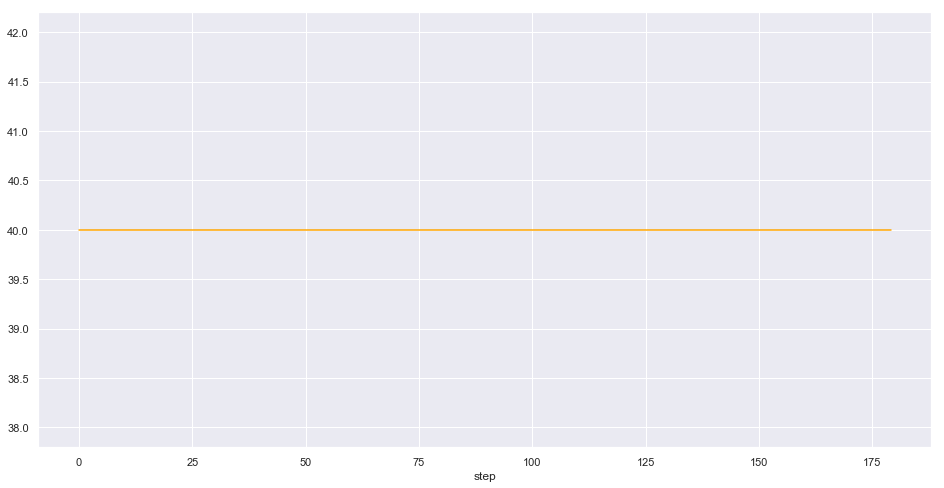

In [10]:
data.groupby('step')['fraud'].sum().plot(figsize=(16,8), color='orange');

** Erkenntnis: Transaktionen nehmen über die Zeit zu, Fraud bleibt über die gesammte Zeit konstant.**

** Was sagt uns das? **

---

## Fraud in Gruppen

Wie sehen die fraud-Raten in unterschiedlichen Gruppen aus?

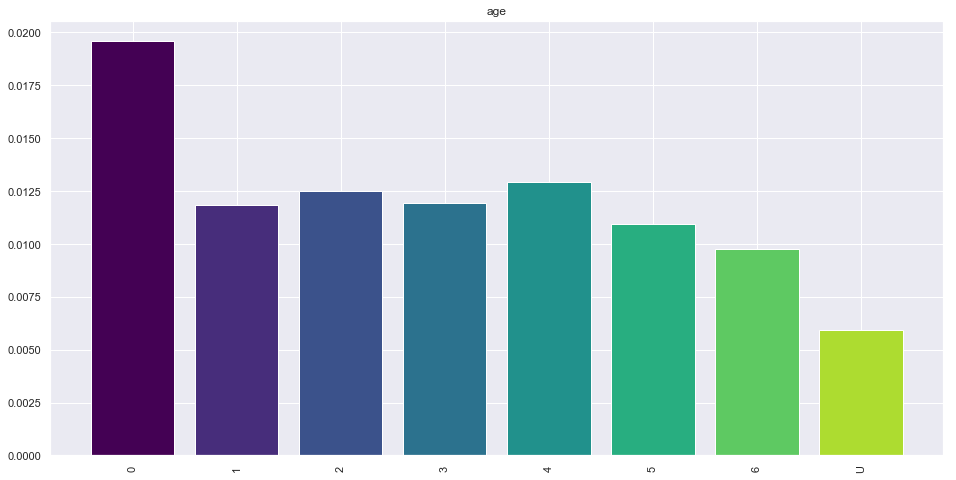

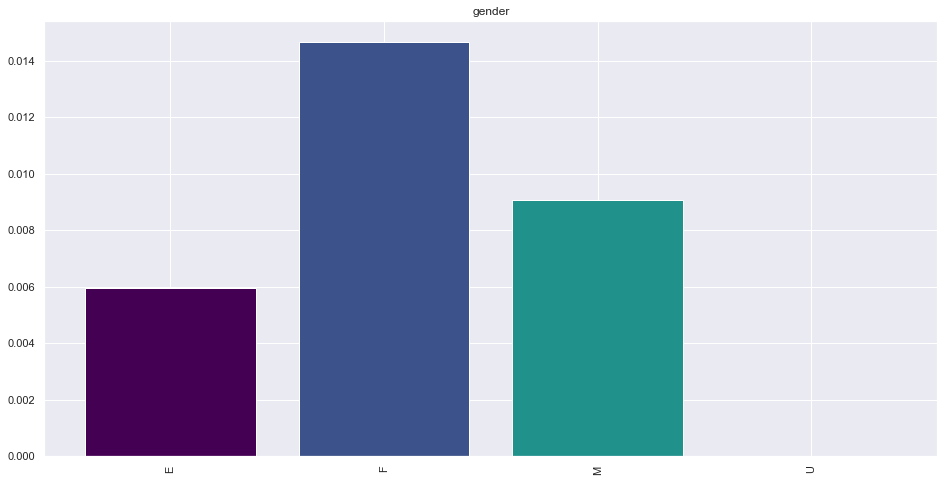

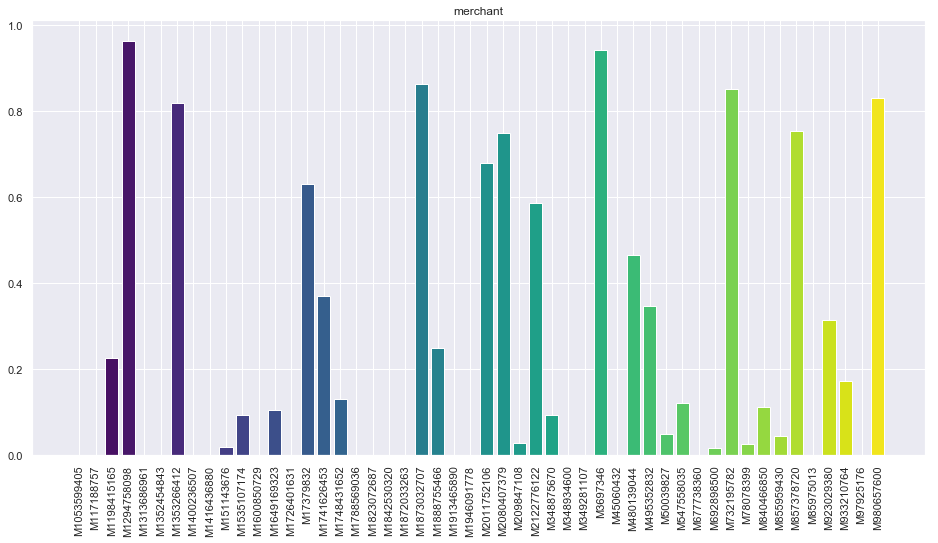

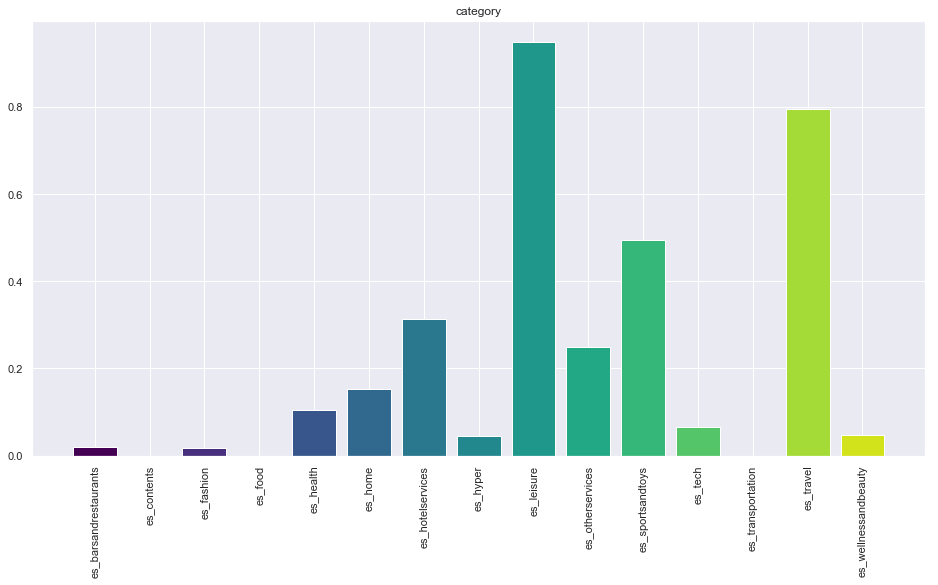

In [11]:
# farben nach reihenfolge

color_map = cm.get_cmap('viridis')
i = 1
for col in ['age','gender','merchant','category']:
    # the data
    plot_data = data.groupby(col).mean()
    x = plot_data.index
    y = plot_data['fraud']
    
    num_groups = plot_data.count()['fraud']
    
    # the figure
    plt.figure(i, figsize=(16,8))
    plt.xticks(rotation='vertical')
    plt.title(col)
    
    # the colors
    color_array = list()
    for group in range(num_groups):
        color_idx =  int(group * color_map.N/num_groups)
        color_value = color_map.colors[color_idx]
        color_array.append(mpl.colors.to_hex(color_value))
    
    # the barplot
    plt.bar(x, y, color=color_array);
    
    # the figure counter
    i += 1

### Umsatz in Gruppen

Wie sieht der Umsatz in diesen Gruppen aus?

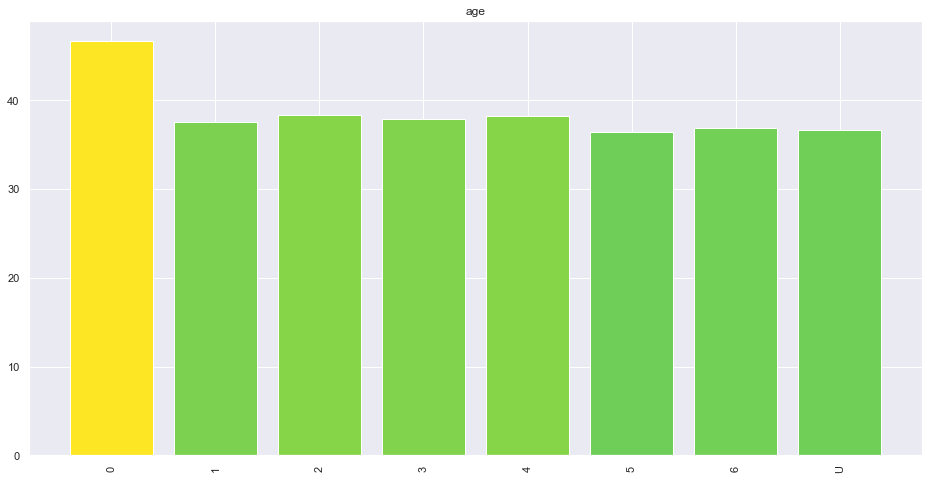

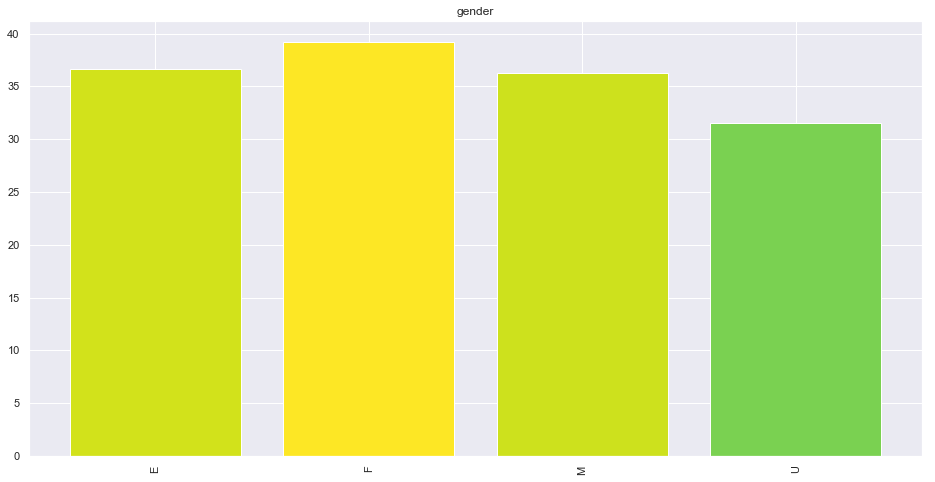

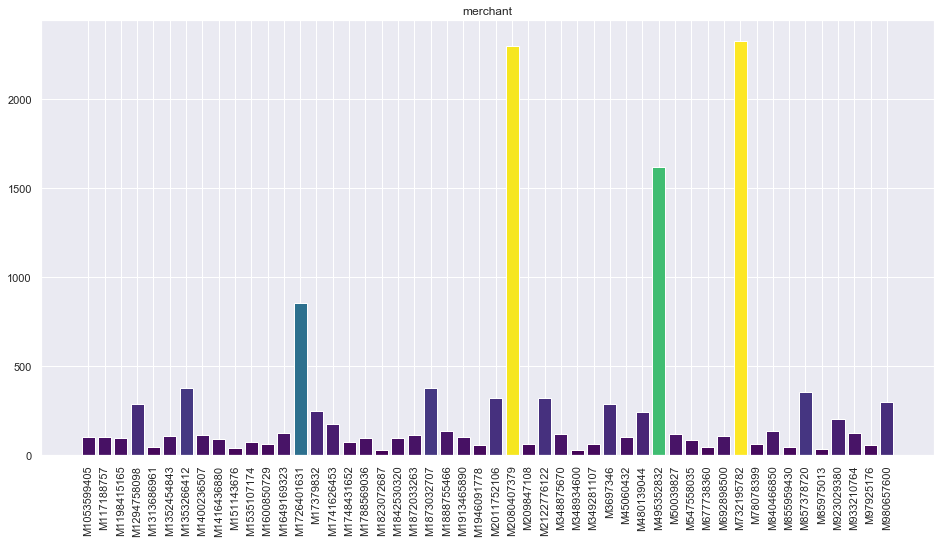

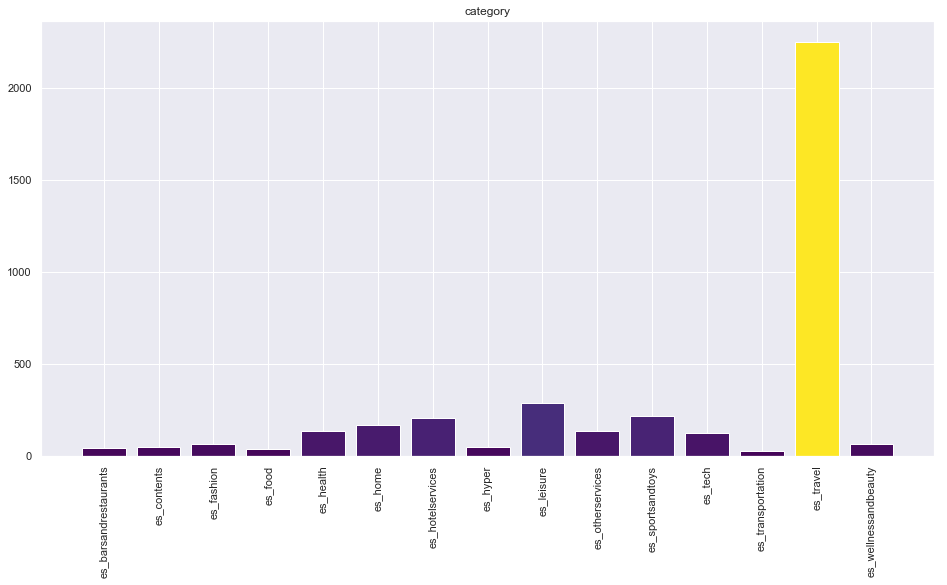

In [12]:
# farben nach größe
color_map = cm.get_cmap('viridis')
i = 1
for col in ['age','gender','merchant','category']:
    # the data
    plot_data = data.groupby(col).mean()
    x = plot_data.index
    y = plot_data['amount']
    
    num_groups = plot_data.count()['amount']
    
    # the figure
    plt.figure(i, figsize=(16,8))
    plt.xticks(rotation='vertical')
    plt.title(col)
    
    # the colors
    color_array = list()
    for y_value in y:
        color_idx =  int(y_value * (color_map.N-1)/y.max())
        color_value = color_map.colors[color_idx]
        color_array.append(mpl.colors.to_hex(color_value))
    
    # the barplot
    plt.bar(x, y, color=color_array);
    
    # the figure counter
    i += 1



**Suchen wir aber nicht eigentlich nach dem Schaden? Also nach dem fraud-amount?**

### Der Schaden durch Fraud

Der Einfachheit halber legen wir uns eine weitere Spalte an, welche den 'fraud-amount' enthält.

In [13]:
data['fraud_amount'] = data['fraud'] * data['amount']

In [14]:
data.head()

,step,customer,age,gender,merchant,category,amount,fraud,fraud_amount
0,0,C1093826151,4,M,M348934600,es_transportation,4.55,0,0.0
1,0,C352968107,2,M,M348934600,es_transportation,39.68,0,0.0
2,0,C2054744914,4,F,M1823072687,es_transportation,26.89,0,0.0
3,0,C1760612790,3,M,M348934600,es_transportation,17.25,0,0.0
4,0,C757503768,5,M,M348934600,es_transportation,35.72,0,0.0


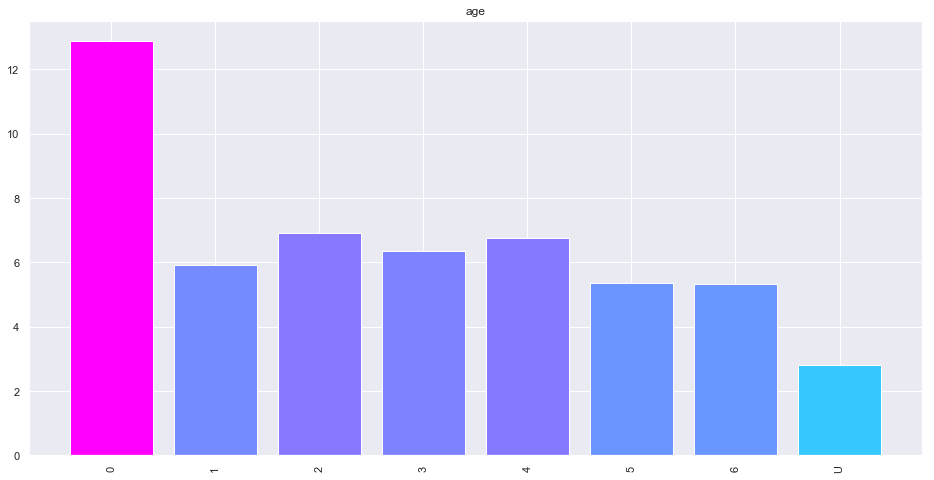

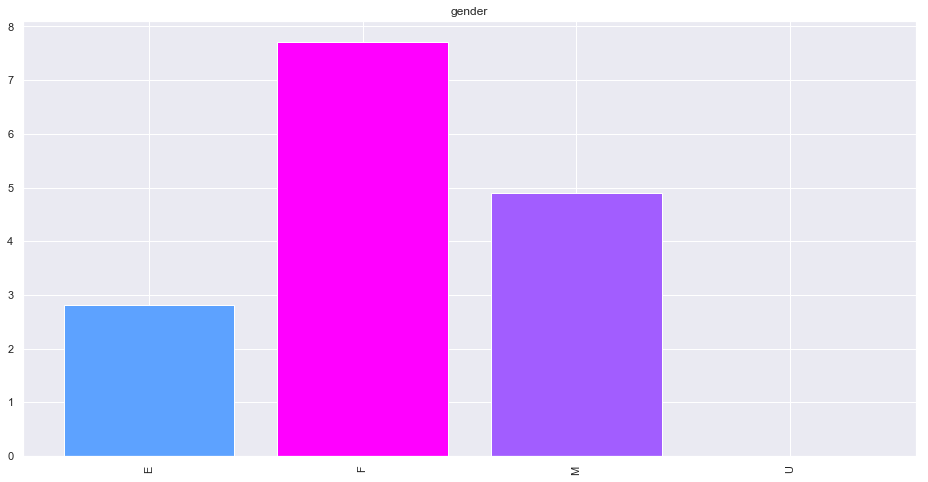

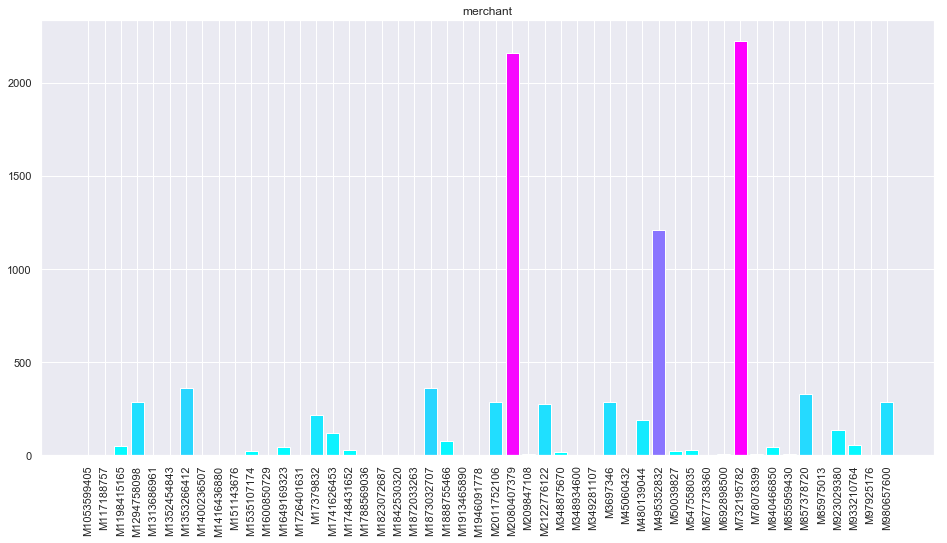

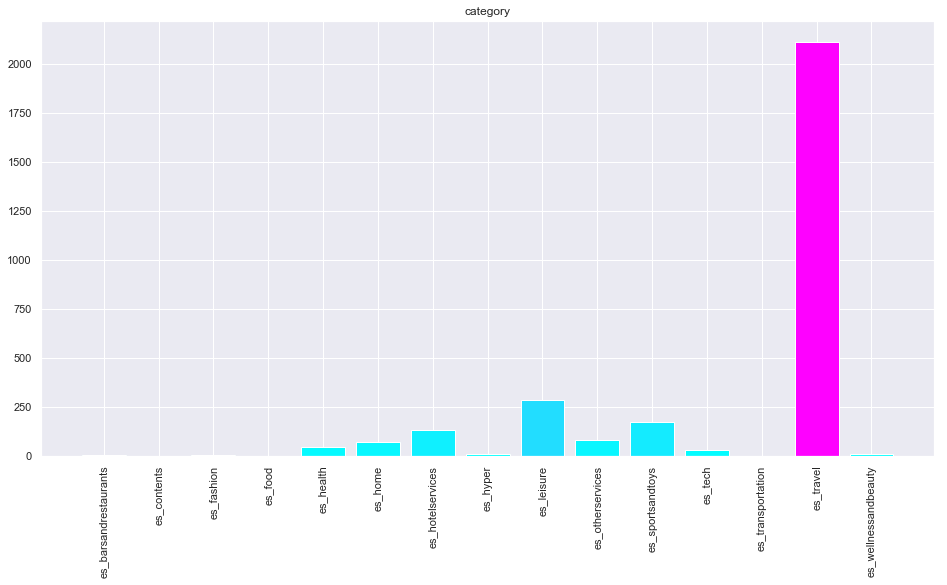

In [15]:
# farben nach größe andere color map (https://matplotlib.org/gallery/color/colormap_reference.html)
color_map = cm.get_cmap('cool')
i = 1
for col in ['age','gender','merchant','category']:
    # the data
    plot_data = data.groupby(col).mean()
    x = plot_data.index
    y = plot_data['fraud_amount']
    
    num_groups = plot_data.count()['fraud_amount']
    
    # the figure
    plt.figure(i, figsize=(16,8))
    plt.xticks(rotation='vertical')
    plt.title(col)
    
    # the colors
    color_array = list()
    for y_value in y:
        color_idx =  int(y_value * (color_map.N-1)/y.max())
        color_value = color_map(color_idx) # Achtung! anderer Zugriff als bei den Perceptual Uniform Sequential colormaps
        color_array.append(mpl.colors.to_hex(color_value))
    
    # the barplot
    plt.bar(x, y, color=color_array);
    
    # the figure counter
    i += 1


**Was erkennen wir hieran?**

**Wollen wir nach weiteren Erkenntnissen suchen?**

**Wollen wir versuchen dies zu automatisieren?**